In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.8 MB/s eta 0:00:00


In [ ]:
!pip install matplotlib

In [ ]:
!pip install -U ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 40.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d71a55f4de5c8c9cc1dae6dac6cdf576a1fb85c217aa92be6dcc0a438ce7f584
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.0 MB/s eta 0:00:00


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 28.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
!pip install permetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import requests
from tqdm import tqdm
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

**Загрузка данных и очистка**

Произведен парсинг данных с помощью API HH.ru

In [ ]:
uni_data = pd.read_csv('uni_data.csv')

In [ ]:
uni_data = uni_data.drop('Unnamed: 0', axis=1)

In [ ]:
uni_data.head()

,key_skills,area,schedule,experience,salary_from,salary_to,currency,created_at,employment,languages,professional_roles
0,"Linux, SQL, Unix",Тверь,Сменный график,От 1 года до 3 лет,NaN,200000.0,RUR,2024-08-22T13:08:27+0300,Полная занятость,NaN,Системный инженер
1,"BPMN, EPC, UML, MS Dynamics CRM, Power BI, SQL...",Москва,Удаленная работа,От 1 года до 3 лет,NaN,150000.0,RUR,2024-08-22T13:08:27+0300,Полная занятость,Английский,Бизнес-аналитик
2,NaN,Москва,Полный день,От 3 до 6 лет,NaN,370000.0,RUR,2024-08-22T13:08:27+0300,Полная занятость,NaN,Аналитик
3,"Работа в команде, Работа с базами данных, Базы...",Симферополь,Полный день,От 3 до 6 лет,35000.0,NaN,RUR,2024-08-22T13:08:27+0300,Полная занятость,NaN,Системный администратор
4,"PostgreSQL, Clickhouse, Numpy, pandas, Kuberne...",Москва,Полный день,От 3 до 6 лет,NaN,350000.0,RUR,2024-08-22T13:08:27+0300,Полная занятость,NaN,Дата-сайентист


Определить тип данных в каждом столбце

In [ ]:
uni_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7469 entries, 0 to 7468
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   key_skills          5280 non-null   object 
 1   area                7469 non-null   object 
 2   schedule            7314 non-null   object 
 3   experience          7469 non-null   object 
 4   salary_from         5169 non-null   float64
 5   salary_to           3586 non-null   float64
 6   currency            6195 non-null   object 
 7   created_at          7469 non-null   object 
 8   employment          7314 non-null   object 
 9   languages           622 non-null    object 
 10  professional_roles  7314 non-null   object 
dtypes: float64(2), object(9)
memory usage: 642.0+ KB


Определить количество отсутствующих значений

In [ ]:
uni_data.isna().sum()

,0
key_skills,2189
area,0
schedule,155
experience,0
salary_from,2300
salary_to,3883
currency,1274
created_at,0
employment,155
languages,6847


Привести данные к необходимым типам

In [ ]:
uni_data['salary_from'] = pd.to_numeric(uni_data['salary_from'], errors='coerce')
uni_data['salary_to'] = pd.to_numeric(uni_data['salary_to'], errors='coerce')

In [ ]:
df_copy = uni_data.copy()

Берем среднее арифметическое от опыта и диапазона зарплат

In [ ]:
def clean_exp(exp):
    try:
        if pd.isna(exp):
            return None

        years = re.findall(r'\d+', exp)
        exp_cleaned = None

        if len(years) == 1:
            exp_cleaned = int(years[0])
        elif len(years) == 2:
            exp_cleaned = (int(years[0]) + int(years[1])) / 2
        elif len(years) == 0:
            exp_cleaned = 0

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

    return exp_cleaned

In [ ]:
def clean_salary(df):
    df.loc[(~df['salary_from'].isna()) & (~df['salary_to'].isna()), 'salary'] = (df['salary_from'] + df['salary_to']) / 2

    df.loc[(~df['salary_from'].isna()) & (df['salary_to'].isna()), 'salary'] = df['salary_from']
    df.loc[(df['salary_from'].isna()) & (~df['salary_to'].isna()), 'salary'] = df['salary_to']
    df = df.drop(['salary_to', 'salary_from'], axis=1)
    return df

In [ ]:
df_copy['salary'] = ''

In [ ]:
df_copy['key_skills'] = df_copy['key_skills'].str.lower()
df_copy['experience'] = df_copy['experience'].apply(clean_exp)
df_copy = clean_salary(df_copy)

In [ ]:
df_copy['salary'] = pd.to_numeric(df_copy['salary'], errors='coerce')

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7469 entries, 0 to 7468
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   key_skills          5280 non-null   object 
 1   area                7469 non-null   object 
 2   schedule            7314 non-null   object 
 3   experience          7469 non-null   float64
 4   currency            6195 non-null   object 
 5   created_at          7469 non-null   object 
 6   employment          7314 non-null   object 
 7   languages           622 non-null    object 
 8   professional_roles  7314 non-null   object 
 9   salary              6195 non-null   float64
dtypes: float64(2), object(8)
memory usage: 583.6+ KB


Признак - названия профессий будут важны для группировки навыков по процессиям. Зарплата будет таргетом.  Необходимо почистить отсутствующие значения в этих столбцах.

In [ ]:
df_copy = df_copy.dropna(subset='salary')
df_copy = df_copy.dropna(subset='professional_roles')

In [ ]:
df_copy.isna().sum()

,0
key_skills,1876
area,0
schedule,0
experience,0
currency,0
created_at,0
employment,0
languages,5696
professional_roles,0
salary,0


Таргетная переменная - зарплата представлена в разных валютах. Это создает необъективную оценку и выбросы.  Переводим в русские рубли,  учитываем курс валют на дату создания вакансии.  Используем API Центрального Банка.

In [ ]:
df_copy['created_at'] = [date[:10] for date in df_copy['created_at']]

In [ ]:
def to_rur(row):
    if row['currency'] != 'RUR':
        date = row['created_at']
        year = date[:4]
        month = date[5:7]
        day = date[8:10]

        url = f'http://www.cbr.ru/scripts/XML_daily.asp?date_req={day}/{month}/{year}'
        df = pd.read_xml(url, encoding='cp1251')
        if row['currency'] == 'BYR':
            row['currency'] = 'BYN'
        value = df[df['CharCode'] == row['currency']]['Value']
        if not value.empty:
            value = value.item().replace(',', '.')
            row['salary'] *= float(value)
            row['currency'] = 'RUR'
    return row

In [ ]:
df_copy = df_copy.apply(to_rur, axis=1)

Валюта и дата создания вакансии больше не нужны для дальнейшего анализа.

In [ ]:
df_copy = df_copy.drop(['currency', 'created_at'], axis=1)

Пропуски в столбце с языками составляют более 15%.

In [ ]:
df_copy = df_copy.drop('languages', axis=1)

Удаляем дубликаты при их наличии

In [ ]:
df_copy = df_copy.drop_duplicates()

In [ ]:
df_copy.head()

,key_skills,area,schedule,experience,employment,professional_roles,salary
0,"linux, sql, unix",Тверь,Сменный график,2.0,Полная занятость,Системный инженер,200000.0
1,"bpmn, epc, uml, ms dynamics crm, power bi, sql...",Москва,Удаленная работа,2.0,Полная занятость,Бизнес-аналитик,150000.0
2,NaN,Москва,Полный день,4.5,Полная занятость,Аналитик,370000.0
3,"работа в команде, работа с базами данных, базы...",Симферополь,Полный день,4.5,Полная занятость,Системный администратор,35000.0
4,"postgresql, clickhouse, numpy, pandas, kuberne...",Москва,Полный день,4.5,Полная занятость,Дата-сайентист,350000.0


Во время парсинга были отобраны вакансии, не связанные с DS. Также столбец professional roles позоляет удобно сгруппировать профессии для дальнейшей обработки навыков.

In [ ]:
roles_to_filter = [
    'Дата-сайентист',
    'Бизнес-аналитик',
    'Аналитик',
    'BI-аналитик, аналитик данных',
    'Системный аналитик',
    'Продуктовый аналитик',
    'Маркетолог-аналитик'
]

filtered_df = df_copy[df_copy['professional_roles'].isin(roles_to_filter)]

По результатам предварительного анализа необходима визуализация

In [ ]:
from ydata_profiling import ProfileReport

ProfileReport(filtered_df, title='My Report')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Признак key_skills будет обрабатан далее. Будет собран словарь синонимов навыков и отобраны уникальные навыки. Признаки будут закодированы. Очистим от отсутствующих значений



In [ ]:
filtered_df = filtered_df.dropna(subset='key_skills')

Рассчет ключевых статистик для каждого типа данных

In [ ]:
filtered_df.describe(include='all')

,key_skills,area,schedule,experience,employment,professional_roles,salary
count,3539,3539,3539,3539.000000,3539,3539,3.539000e+03
unique,2953,182,5,NaN,4,7,NaN
top,"анализ данных, sql, аналитическое мышление, ра...",Москва,Полный день,NaN,Полная занятость,Аналитик,NaN
freq,38,1385,2373,NaN,3250,1854,NaN
mean,NaN,NaN,NaN,2.340492,NaN,NaN,4.207946e+06
std,NaN,NaN,NaN,1.551382,NaN,NaN,5.590248e+07
min,NaN,NaN,NaN,0.000000,NaN,NaN,6.000000e+01
25%,NaN,NaN,NaN,2.000000,NaN,NaN,7.500000e+04
50%,NaN,NaN,NaN,2.000000,NaN,NaN,1.140000e+05
75%,NaN,NaN,NaN,4.500000,NaN,NaN,2.000000e+05


Рассмотрим распределения признаков и удалим выбросы

К выбросам чувствительны коэффициенты корреляции

{'whiskers': [<matplotlib.lines.Line2D at 0x7d32fbb9f940>,
 'caps': [<matplotlib.lines.Line2D at 0x7d32fbb9dc30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d32fbb9e3b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d32fbbd3a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d32fbbd2620>],
 'means': []}

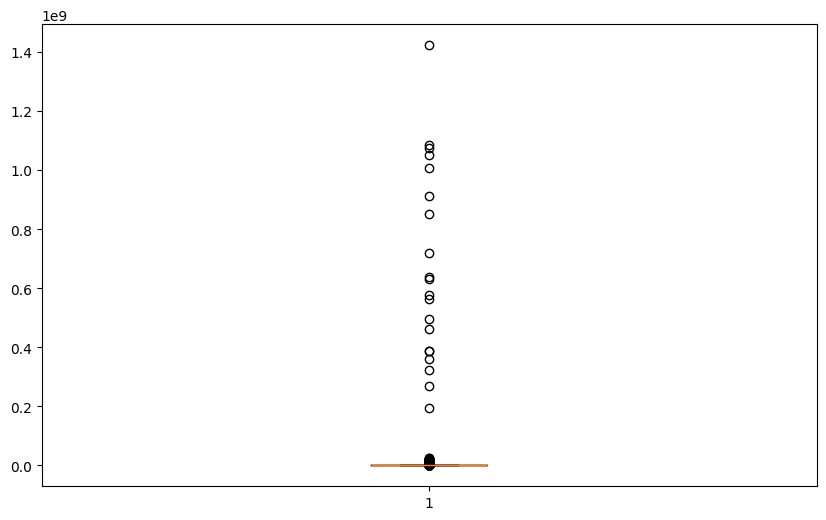

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(10,6))
plt.boxplot(filtered_df['salary'])

In [ ]:
q_high = filtered_df.salary.quantile(0.915)
q_low = filtered_df.salary.quantile(0.085)
clear_data = filtered_df[(filtered_df.salary < q_high) & (filtered_df.salary > q_low)]
print(f"До удаления выбросов {filtered_df.shape[0]}")
print(f"После удаления выбросов {clear_data.shape[0]}")
print(f"Удалились данные {filtered_df.shape[0] - clear_data.shape[0]}")

До удаления выбросов 3539
После удаления выбросов 2903
Удалились данные 636


{'whiskers': [<matplotlib.lines.Line2D at 0x7d32fbaa74c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d32fbaa7c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d32fbaa5e40>],
 'medians': [<matplotlib.lines.Line2D at 0x7d32fbaa54e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d32fbaa5780>],
 'means': []}

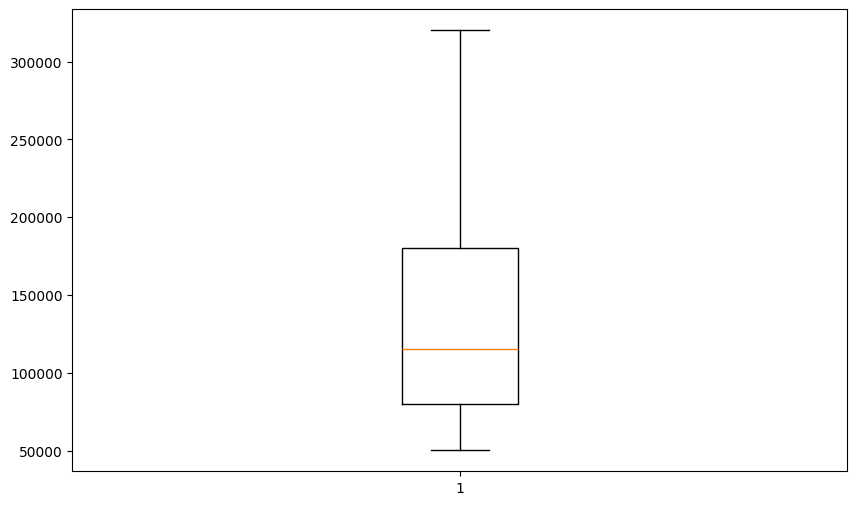

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(10,6))
plt.boxplot(clear_data['salary'])

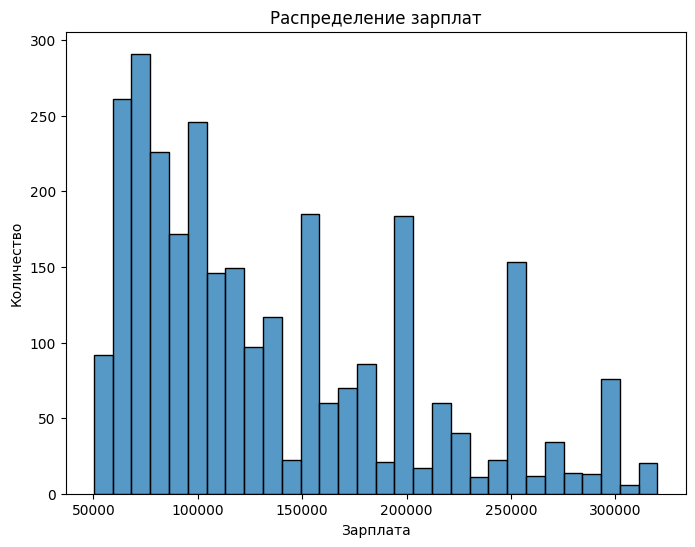

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(clear_data['salary'], bins=30, kde=False)
plt.title('Распределение зарплат')
plt.xlabel('Зарплата')
plt.ylabel('Количество')
plt.show()

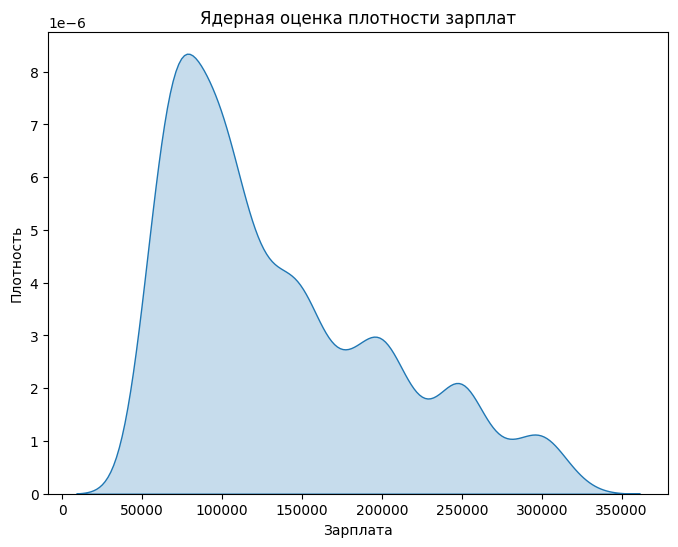

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(clear_data['salary'], shade=True)
plt.title('Ядерная оценка плотности зарплат')
plt.xlabel('Зарплата')
plt.ylabel('Плотность')
plt.show()

In [ ]:
profs = []
for prof in clear_data['professional_roles']:
    if isinstance(prof, str):
        profs.append(prof)

prof_counts = Counter(profs)

df_profs_counts = pd.DataFrame(prof_counts.items(), columns=['Job', 'Frequency']).sort_values(by='Frequency', ascending=False)
df_profs_counts

,Job,Frequency
1,Аналитик,1487
0,Бизнес-аналитик,482
6,Системный аналитик,442
2,"BI-аналитик, аналитик данных",303
3,Дата-сайентист,104
4,Продуктовый аналитик,77
5,Маркетолог-аналитик,8


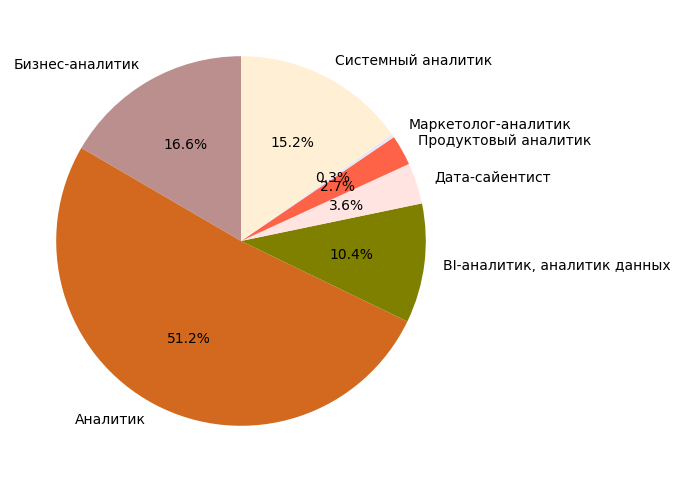

In [ ]:
fig = plt.figure(figsize=(10,6))
colors = ['rosybrown', 'chocolate', 'olive', 'mistyrose', 'tomato', 'lavender', 'papayawhip']
plt.pie(prof_counts.values(), colors=colors, labels=prof_counts.keys(), startangle=90, autopct='%.1f%%')
plt.show()

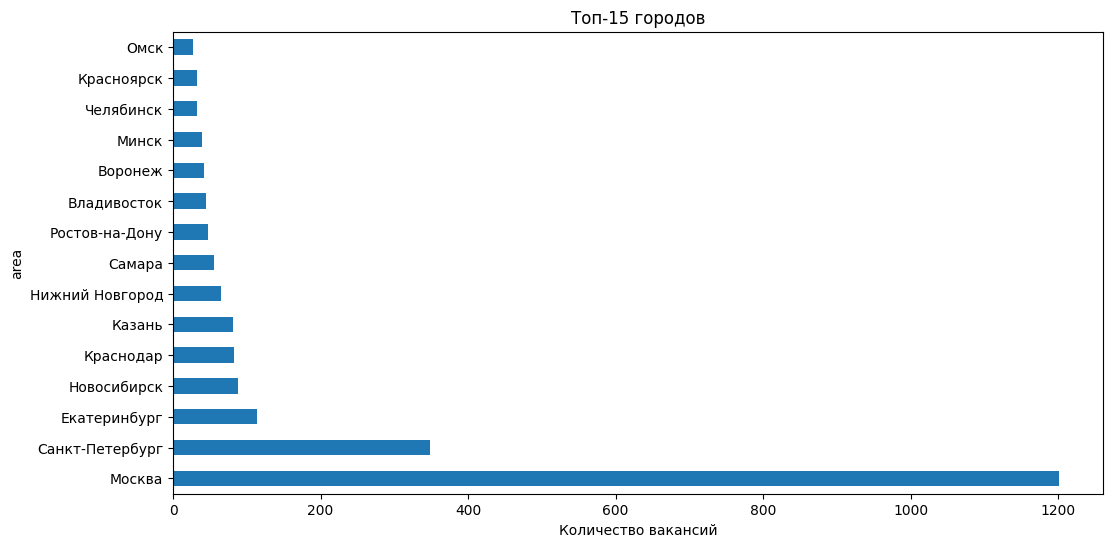

In [ ]:
plt.figure(figsize=(12,6))
clear_data["area"].value_counts().nlargest(15).plot(kind='barh')
plt.title('Топ-15 городов')
plt.xlabel('Количество вакансий')
plt.show()

Распределение графика работы, опыта работы, занятости

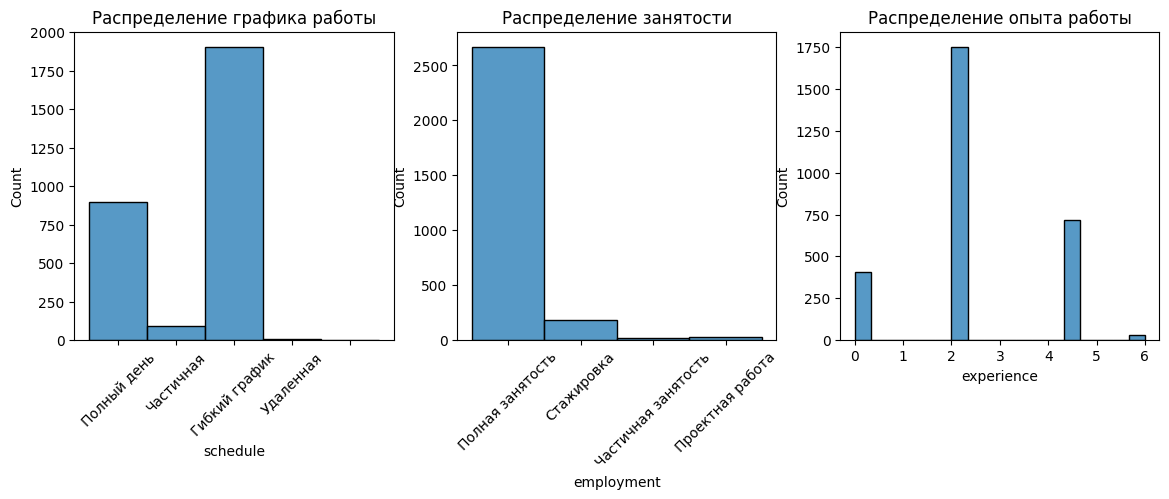

In [ ]:
fig = plt.figure()
fig.tight_layout()
fig.set_size_inches(14, 4)
ax_1 = fig.add_subplot(131)
sns.histplot(clear_data, x='schedule')
ax_1.set_xticklabels(['Полный день', 'Частичная', 'Гибкий график', 'Удаленная'], rotation=45)

ax_2 = fig.add_subplot(132)
ax_2 = sns.histplot(clear_data, x='employment')
ax_2.set_xticklabels(['Полная занятость', 'Стажировка', 'Частичная занятость', 'Проектная работа'], rotation=45)

ax_3 = fig.add_subplot(133)
ax_3 = sns.histplot(clear_data, x='experience')

ax_1.set(title = 'Распределение графика работы')
ax_2.set(title = 'Распределение занятости')
ax_3.set(title = 'Распределение опыта работы')

plt.show()

Распределение графика работы, названия работы, занятости от таргетной переменной

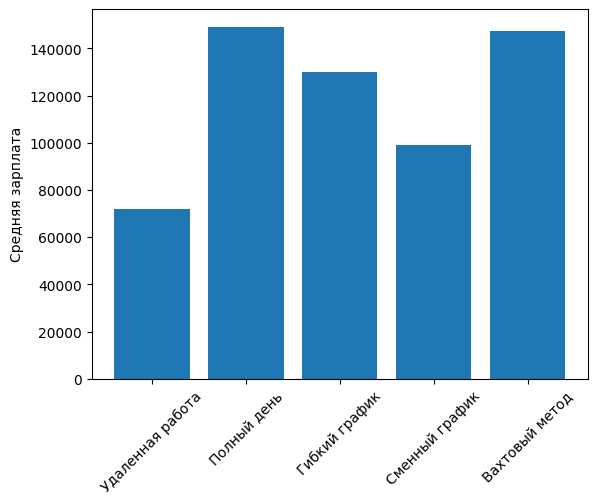

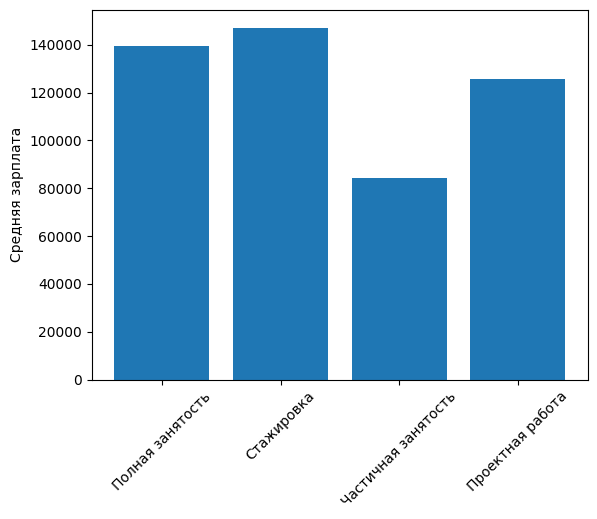

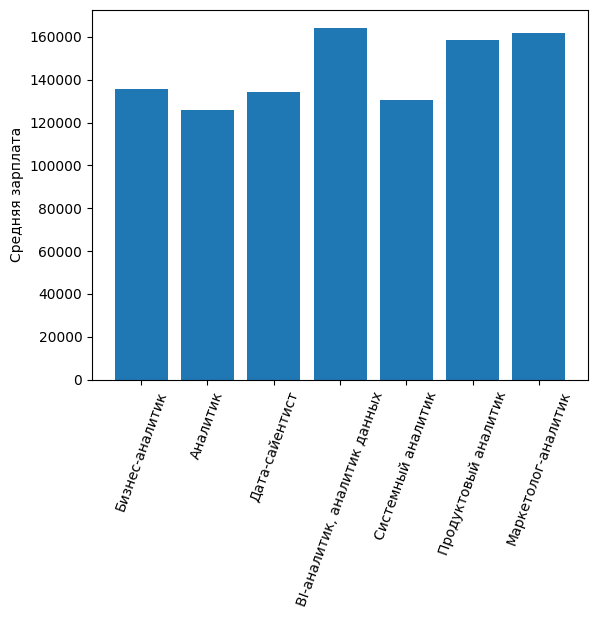

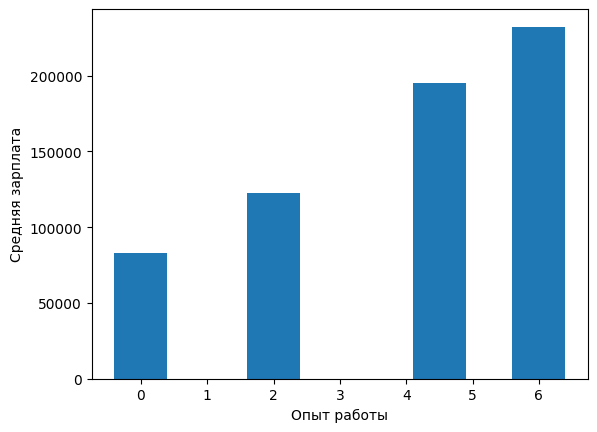

In [ ]:
main = clear_data.groupby('schedule')['salary'].mean()

fig, ax = plt.subplots()
ax.bar(main.index, main)

ax.set_xticks(range(len(main.index)))
ax.set_xticklabels(['Удаленная работа', 'Полный день', 'Гибкий график',
       'Сменный график', 'Вахтовый метод'], rotation=45)
ax.set_ylabel('Средняя зарплата')

main_2 = clear_data.groupby('employment')['salary'].mean()

fig, ax = plt.subplots()
ax.bar(main_2.index, main_2)

ax.set_xticks(range(len(main_2.index)))
ax.set_xticklabels(['Полная занятость', 'Стажировка', 'Частичная занятость',
       'Проектная работа'], rotation=45)
ax.set_ylabel('Средняя зарплата')

main_3 = clear_data.groupby('professional_roles')['salary'].mean()

fig, ax = plt.subplots()
ax.bar(main_3.index, main_3)

ax.set_xticks(range(len(main_3.index)))
ax.set_xticklabels(['Бизнес-аналитик', 'Аналитик', 'Дата-сайентист',
       'BI-аналитик, аналитик данных', 'Системный аналитик',
       'Продуктовый аналитик', 'Маркетолог-аналитик'], rotation=70, fontsize=10)
ax.set_ylabel('Средняя зарплата')

main_4 = clear_data.groupby('experience')['salary'].mean()

fig, ax = plt.subplots()
ax.bar(main_4.index, main_4)
ax.set_xlabel('Опыт работы')
ax.set_ylabel('Средняя зарплата')

plt.show()

Эмпирически установлено, что ошибка больше, когда CatBoost сам обрабатывает категориальные признаки. Качество было лучше при ручном енкодинге признаков

In [ ]:
col_clear_data = clear_data.copy()

In [ ]:
o = ['area', 'schedule', 'employment', 'professional_roles']
for col in o:
    if col_clear_data[col].nunique() < 5:
        one_hot = pd.get_dummies(col_clear_data[col], prefix=col, drop_first=True)
        col_clear_data = pd.concat([col_clear_data.drop(col, axis=1), one_hot], axis=1)
    else:
        mean_target = col_clear_data.groupby(col)['salary'].mean()
        col_clear_data[col] = col_clear_data[col].map(mean_target)

Масштабируем признаки для построения матриц корреляций

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = col_clear_data.select_dtypes(exclude=object).columns
scaler = StandardScaler()
col_clear_data[numerical_cols] = scaler.fit_transform(col_clear_data[numerical_cols])

In [ ]:
col_clear_data.head()

,key_skills,area,schedule,experience,professional_roles,salary,employment_Проектная работа,employment_Стажировка,employment_Частичная занятость
1,"bpmn, epc, uml, ms dynamics crm, power bi, sql...",0.977508,1.337151,-0.259489,-0.116973,0.206796,-0.095064,-0.259383,-0.089365
9,"коммуникабельность, системность, обучаемость, ...",0.977508,1.530328,-0.259489,-0.723626,-0.678130,-0.095064,-0.259383,-0.089365
15,"sql, базы данных, python, power bi, ms sql, ap...",-1.454857,-0.680527,-0.259489,-0.035228,-0.825617,-0.095064,-0.259383,-0.089365
33,"power bi, ms excel, социологические исследования",0.977508,-0.680527,-1.634116,-0.035228,-1.120592,-0.095064,-0.259383,-0.089365
34,"python, pandas, numpy, scikit-learn, tensorflo...",0.045574,-0.680527,-0.259489,-0.723626,-0.235667,-0.095064,-0.259383,-0.089365


Более всего коррелируют salary и experience (0.53), что указывает на положительную зависимость опыта от заработной платы.
Также коррелируют salary и area (0.46), что может говорить о зависимости зарплаты от географического расположения.
employment_Стажировка имеет отрицательную корреляцию с salary (-0.21), и experience (-0.37), что логично.

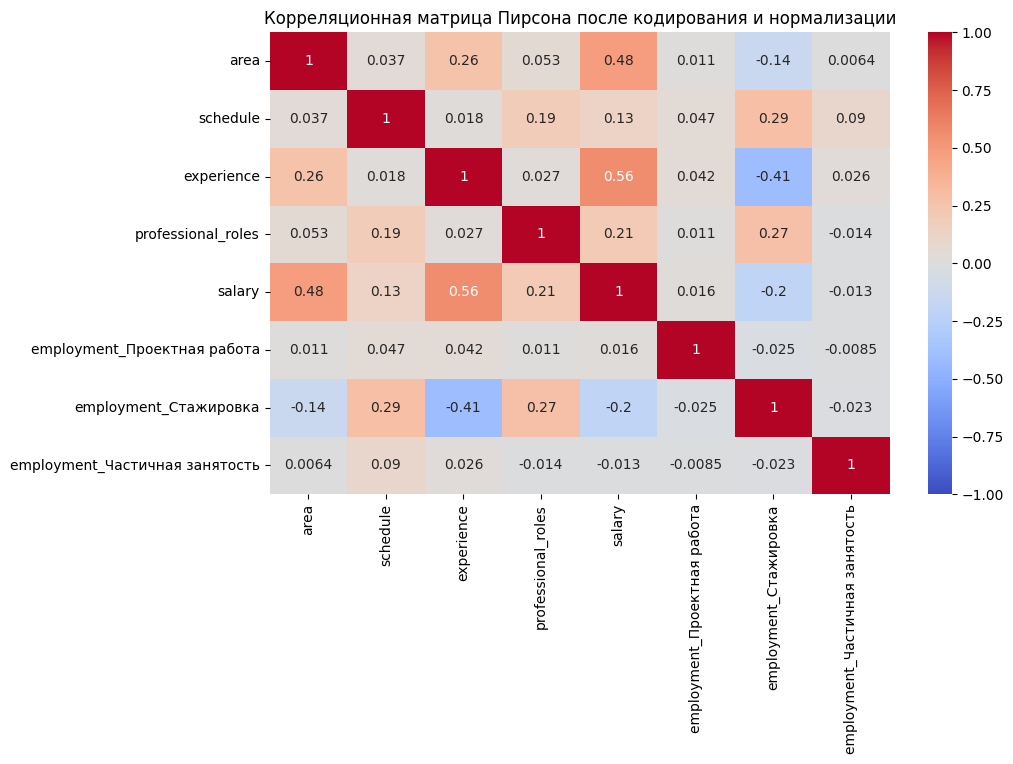

In [ ]:
corr_matrix = col_clear_data.drop('key_skills', axis=1).corr(method='pearson')

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Корреляционная матрица Пирсона после кодирования и нормализации')
plt.show()

Коэффициент Спирмена устойчив к выбросам

Более всего коррелируют salary и experience (0.54), что указывает на положительную зависимость опыта от заработной платы.
Также коррелируют salary и area (0.48), что может говорить о зависимости зарплаты от географического расположения.
employment_Стажировка имеет отрицательную корреляцию с salary (-0.21), и experience (-0.37), что логично.

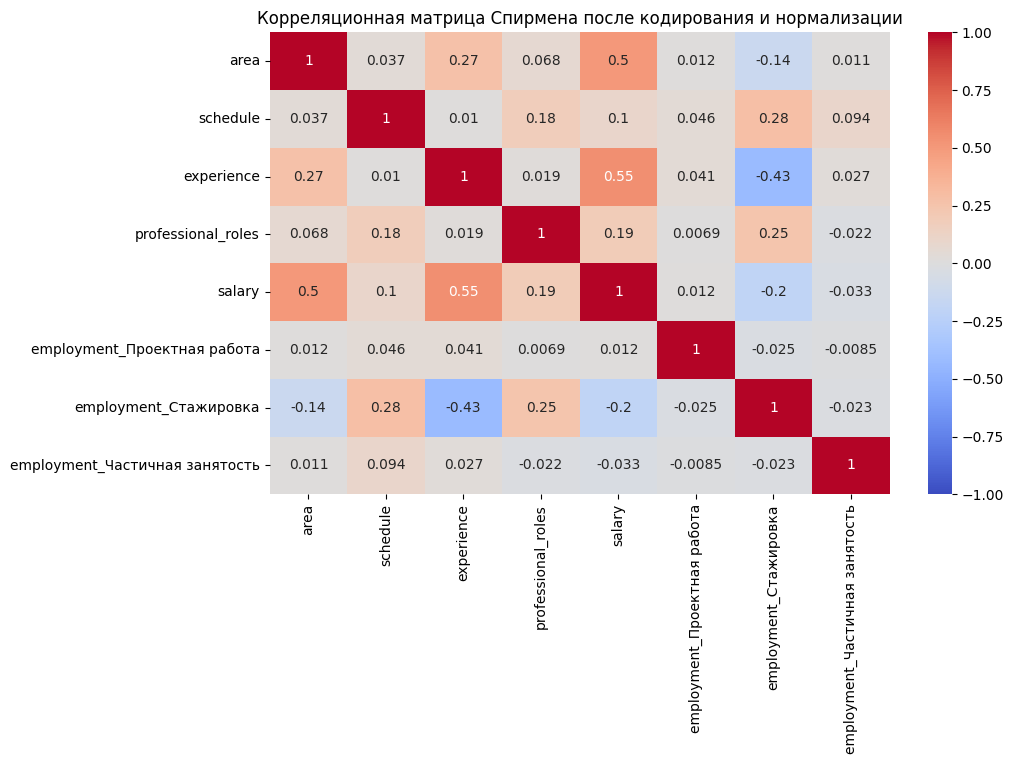

In [ ]:
corr_matrix = col_clear_data.drop('key_skills', axis=1).corr(method='spearman')

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Корреляционная матрица Спирмена после кодирования и нормализации')
plt.show()

Матрица Фика фиксирует нелинейную зависимость


interval columns not set, guessing: ['area', 'schedule', 'experience', 'professional_roles', 'salary', 'employment_Проектная работа', 'employment_Стажировка', 'employment_Частичная занятость']


<Axes: >

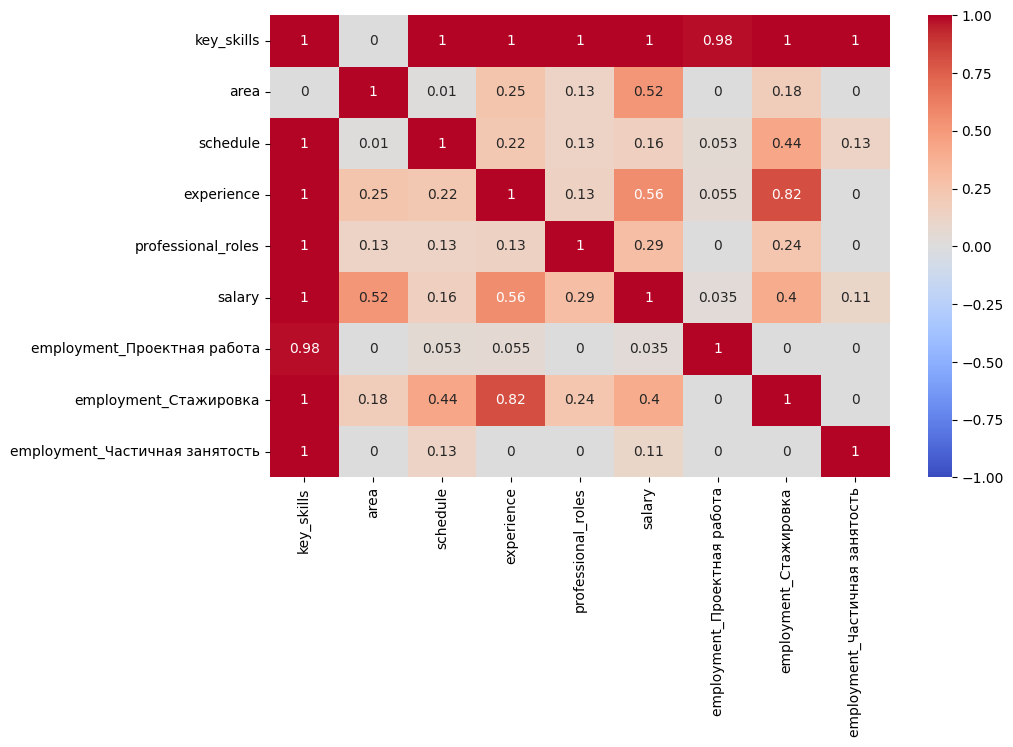

In [ ]:
import phik
from phik import report
plt.figure(figsize=(10, 6))
sns.heatmap(col_clear_data.phik_matrix(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

Коффициенты Спирмана (робастны к выбросам) и коэффициента Пирсона отлчаются от друг от друга максимум на сотые значения -> в данных отсутствуют выбросы

Разница в коэффициентах корреляции между матрицами Спирмена и Фика может указывать на наличие нелинейных зависимостей в данных.

Значительная разница между коэффициентами корреляции Спирмена (-0.43) и Пфика (0.82) между признаками employment_Стажировка и experience действительно указывает на наличие нелинейной зависимости между этими переменными. Монотонная зависимость указывала: чем меньше опыт работы, тем выше вероятность, что человек окажется на стажировке. Высокая нелинейность может быть интерпретирована как резкре понижение вероятности нахождения на стажировке при повышении опыта

Выявлена очень высокая нелинейная, сложная зависимость опыта, занятости, графика работы от навыков. Далее навыки будут сгруппированы по профессиям и почищены. Преобразование поможет избежать утечки данных

Остальные данные содержат очень слабую нелинейность

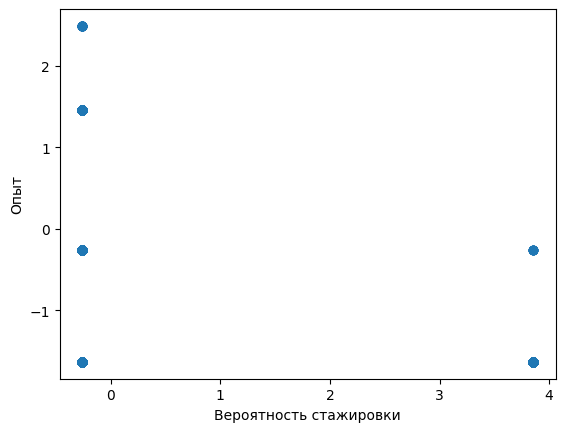

In [ ]:
plt.scatter(col_clear_data['employment_Стажировка'], col_clear_data['experience'])
plt.xlabel('Вероятность стажировки')
plt.ylabel('Опыт')
plt.show()

График указывает на нелинейную зависимость между опытом и занятостью - стажировка


Конструируем новые признаки - работаем с навыками и другими признаками

In [ ]:
clear_data.head()

,key_skills,area,schedule,experience,employment,professional_roles,salary
1,"bpmn, epc, uml, ms dynamics crm, power bi, sql...",Москва,Удаленная работа,2.0,Полная занятость,Бизнес-аналитик,150000.0
9,"коммуникабельность, системность, обучаемость, ...",Москва,Гибкий график,2.0,Полная занятость,Аналитик,90000.0
15,"sql, базы данных, python, power bi, ms sql, ap...",Калининград,Полный день,2.0,Полная занятость,"BI-аналитик, аналитик данных",80000.0
33,"power bi, ms excel, социологические исследования",Москва,Полный день,0.0,Полная занятость,"BI-аналитик, аналитик данных",60000.0
34,"python, pandas, numpy, scikit-learn, tensorflo...",Санкт-Петербург,Полный день,2.0,Полная занятость,Аналитик,120000.0


Рассмотрим навыки для каждой профессии отдельно

In [ ]:
data_bi = clear_data[clear_data['professional_roles'] == 'BI-аналитик, аналитик данных']
data_anal = clear_data[clear_data['professional_roles'] == 'Аналитик']
data_bus = clear_data[clear_data['professional_roles'] == 'Бизнес-аналитик']
data_sci = clear_data[clear_data['professional_roles'] == 'Дата-сайентист']
data_prod = clear_data[clear_data['professional_roles'] == 'Продуктовый аналитик']
data_sys = clear_data[clear_data['professional_roles'] == 'Системный аналитик']
data_mar = clear_data[clear_data['professional_roles'] == 'Маркетолог-аналитик']

In [ ]:
o = ['area', 'schedule', 'employment', 'professional_roles']
for col in o:
    if clear_data[col].nunique() < 5:
        one_hot = pd.get_dummies(clear_data[col], prefix=col, drop_first=True)
        clear_data = pd.concat([clear_data.drop(col, axis=1), one_hot], axis=1)
    else:
        mean_target = clear_data.groupby(col)['salary'].mean()
        clear_data[col] = clear_data[col].map(mean_target)

In [ ]:
clear_data.head()

,key_skills,area,schedule,experience,professional_roles,salary,employment_Проектная работа,employment_Стажировка,employment_Частичная занятость
1,"bpmn, epc, uml, ms dynamics crm, power bi, sql...",167978.208301,147489.274255,2.0,134339.587396,150000.0,False,False,False
9,"коммуникабельность, системность, обучаемость, ...",167978.208301,149152.194565,2.0,125838.458919,90000.0,False,False,False
15,"sql, базы данных, python, power bi, ms sql, ap...",88352.941176,130120.602117,2.0,135485.097607,80000.0,False,False,False
33,"power bi, ms excel, социологические исследования",167978.208301,130120.602117,0.0,135485.097607,60000.0,False,False,False
34,"python, pandas, numpy, scikit-learn, tensorflo...",137470.633333,130120.602117,2.0,125838.458919,120000.0,False,False,False


In [ ]:
clear_data['employment_Проектная работа'] = clear_data['employment_Проектная работа'].astype(int)
clear_data['employment_Стажировка'] = clear_data['employment_Стажировка'].astype(int)
clear_data['employment_Частичная занятость'] = clear_data['employment_Частичная занятость'].astype(int)

In [ ]:
#Создадим признаки,  которые лучше объяснят модели присутствующую нелинейность
clear_data['experience^3'] = clear_data['experience'].apply(lambda x: x ** 3)
clear_data['exp+emp_Стаж'] = clear_data['experience'] + clear_data['employment_Стажировка']

In [ ]:
#Новые признаки
clear_data['has_experience'] = (clear_data['experience'] > 0).astype(int)

In [ ]:
def ecd_skills(df, skills):
    df['key_skills'] = df['key_skills'].fillna('')
    df['key_skills'] = df['key_skills'].apply(lambda x: [skill.strip() for skill in x.split(',')])
    for skill in skills:
        df[skill] = df['key_skills'].apply(lambda x: 1 if skill in x else 0)
    return df

In [ ]:
def freq_skills(df):
    skills = []
    for entry in df['key_skills']:
        if isinstance(entry, str):
            skills.extend([skill.strip().lower() for skill in entry.replace(';', ',').split(',')])

    skill_counts = Counter(skills)

    df_skill_counts = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency']).sort_values(by='Frequency', ascending=False)

    return df_skill_counts

In [ ]:
enc_skills = []
def clean_skills(skills_list, *args):
    skills_list.remove(*args)
    enc_skills.extend(skills_list)
    return enc_skills

**Считаем навыки редкими, если они встречаются реже, чем 5% от максимальной частоты**

In [ ]:
freq_bi = freq_skills(data_bi)
freq_anal = freq_skills(data_anal)
freq_bus = freq_skills(data_bus)
freq_sci = freq_skills(data_sci)
freq_mar = freq_skills(data_mar)
freq_prod = freq_skills(data_prod)
freq_sys = freq_skills(data_sys)

In [ ]:
freq_bi = freq_bi[freq_bi['Frequency'] > 9]

In [ ]:
freq_anal = freq_anal[freq_anal['Frequency'] > 19]

In [ ]:
freq_bus = freq_bus[freq_bus['Frequency'] > 10]

In [ ]:
freq_sci = freq_sci[freq_sci['Frequency'] > 5]

In [ ]:
freq_mar

,Skill,Frequency
12,маркетинговые исследования,4
13,маркетинговый анализ,3
14,ms powerpoint,2
2,конкурентная аналитика,2
3,анализ бизнес показателей,2
1,аналитические исследования,2
40,ga4,1
31,бренд стратегия,1
32,а/b-тест,1
33,ux-исследования,1


In [ ]:
freq_prod = freq_prod[freq_prod['Frequency'] > 1]

In [ ]:
freq_sys = freq_sys[freq_sys['Frequency'] > 1]

**Находим синонимы выражений и приводим навыки к единому виду**

In [ ]:
syn_dict = {
    'анализ продаж': 'аналитика продаж',
    'анализ конкурентной среды': 'конкурентная аналитика',
    'big data': 'большие данные',
    'работа с большим объемом информации': 'большие данные',
    'bi': 'ms power bi',
    'power bi': 'ms power bi',
    'power point': 'ms powerpoint',
    'machine learning': 'машинное обучение',
    'классическое машинное обучение': 'машинное обучение',
    'математическая статистика': 'статистика',
    'статистический анализ': 'статистика',
    'databases': 'базы данных',
    'работа с базами данных': 'базы данных',
    'опыт работы с базами данных': 'базы данных',
    'аналитический склад ума': 'аналитическое мышление',
    'подготовка отчетов': 'аналитические отчеты',
    'формирование аналитической отчетности': 'аналитические отчеты',
    'data analysis': 'анализ данных',
    'сбор и анализ информации': 'анализ данных',
    'аналитические исследования': 'анализ данных',
    'системное мышление': 'системный анализ',
    'маркетинговая стратегия': 'маркетинговое планирование',
    'анализ бизнес показателей': 'бизнес-анализ',
    'анализ бизнес-процессов': 'бизнес-анализ',
    'описание бизнес-процессов': 'бизнес-анализ',
    'маркетинговые исследования': 'маркетинговый анализ',
    'agile product management': 'agile',
    'проведение презентаций': 'навыки презентации',
    'eda': 'анализ данных'}

words_2_del = ['', 'работа в команде', 'грамотная речь', 'обучение и развитие', 'коммуникабельность', 'системность',
               'обучаемость', 'оперативность', 'нацелен на результат', 'удаленная работа', 'управление командой', 'работа в команде	',
               'умение работать в коллективе', 'пользователь пк', 'точность и внимательность к деталям', 'ответственность']

def replace_synonyms(col, d):
    for i, line in enumerate(col):
        if isinstance(line, str):
            new_line = []
            words = [word.strip() for word in line.replace(';', ',').split(',')]
            new_line = [d[word] if word in d else word for word in words]
            new_line = [word for word in new_line if word not in words_2_del]
        col[i] = ','.join(new_line)
    return col

clear_data['key_skills'] = replace_synonyms(clear_data['key_skills'], syn_dict)

In [ ]:
import re

pattern = re.compile(r'\b(?:' + '|'.join(re.escape(key) for key in syn_dict.keys()) + r')\b', re.IGNORECASE)

def replace_synonyms(text, pattern, syn_dict):
    if isinstance(text, str):
        def synonym_replacer(match):
            found_word = match.group(0).lower()
            return syn_dict.get(found_word, found_word)

        replaced_text = re.sub(pattern, synonym_replacer, text)

        words = replaced_text.split()
        unique_words = list(dict.fromkeys(words))
        return ' '.join(unique_words)

    return text

clear_data['key_skills'] = clear_data['key_skills'].apply(lambda x: replace_synonyms(x, pattern, syn_dict))

In [ ]:
words_2_del = ['', 'работа в команде', 'грамотная речь', 'обучение и развитие', 'коммуникабельность', 'системность',
               'обучаемость', 'оперативность', 'нацелен на результат', 'удаленная работа', 'управление командой',
               'работа в команде', 'умение работать в коллективе', 'пользователь пк',
               'точность и внимательность к деталям', 'ответственность', 'умение принимать решения', 'командообразование']

pattern = re.compile(r'\b(?:' + '|'.join(re.escape(word) for word in words_2_del if word) + r')\b', re.IGNORECASE)

def clean_text(text, pattern):
    if isinstance(text, str):
        cleaned_text = re.sub(pattern, '', text)
        cleaned_text = re.sub(r'\s{2,}', ' ', cleaned_text).strip()
        return cleaned_text
    return text

clear_data['key_skills'] = clear_data['key_skills'].apply(lambda x: clean_text(x, pattern))

In [ ]:
def get_skills(df):
    skill_list = []
    for skills in df['Skill']:
        if isinstance(skills, str):
            skill_list.extend([skill.strip().lower() for skill in skills.replace(';', ',').split(',')])
    final_skills = list(set(skill_list))
    return final_skills

In [ ]:
all_skills = (
    get_skills(freq_bi) +
    get_skills(freq_anal) +
    get_skills(freq_bus) +
    get_skills(freq_sci) +
    get_skills(freq_mar) +
    get_skills(freq_prod) +
    get_skills(freq_sys)
)

In [ ]:
all_skills = list(set(all_skills))

In [ ]:
d_w = ['консультирование', 'организаторские навыки', 'дистанционное обучение', 'управление требованиями', 'деловая переписка', 'техническое обслуживание', 'обучение и развитие', 'системный подход', 'английский язык', 'навыки переговоров', 'программы лояльности', 'ориентация на результат', 'техническая поддержка', 'сбор требований', 'коммуникабельность', 'деловое общение', 'умение работать в коллективе', 'ведение переговоров', 'ответственность', 'контроль выполнения задач', 'работа в команде', 'управление командой', 'деловая коммуникация', 'обучение персонала', 'обучение', 'протоколами связи и сенсорами', 'работа в условиях многозадачности', 'техническое задание', 'точность и внимательность к деталям', 'управление проектами', '', 'удаленная работа', 'планирование карьеры', 'сопровождение клиентов', 'тайм-менеджмент', 'грамотная речь']
for i in d_w:
  if i in all_skills:
    all_skills.remove(i)

In [ ]:
ecd_data = clear_data.copy()
ecd_skills(ecd_data, all_skills)

,key_skills,area,schedule,experience,professional_roles,salary,employment_Проектная работа,employment_Стажировка,employment_Частичная занятость,experience^3,...,проектная документация,erp-системы на базе 1с,framework scrum,r,разработка бизнес-модели,gtm,эконометрика,big data,а/b-тест,bi
1,[],167978.208301,147489.274255,2.0,134339.587396,150000.0,0,0,0,8.0,...,0,0,0,0,0,0,0,0,0,0
9,"[market research, анализ данных, конкурентная ...",167978.208301,149152.194565,2.0,125838.458919,90000.0,0,0,0,8.0,...,0,0,0,0,0,0,1,0,0,0
15,"[английский язык, sql, исследовательское тести...",88352.941176,130120.602117,2.0,135485.097607,80000.0,0,0,0,8.0,...,0,0,0,0,0,0,0,0,0,0
33,"[аналитическое мышление, sql, анализ данных, а...",167978.208301,130120.602117,0.0,135485.097607,60000.0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
34,"[bpmn, crm, бизнес-процессы, бизнес-анализ, оп...",137470.633333,130120.602117,2.0,125838.458919,120000.0,0,0,0,8.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7456,"[sql, аналитическое мышление, системный анализ...",167978.208301,130120.602117,6.0,161713.669378,300000.0,0,0,0,216.0,...,0,0,0,0,0,0,0,0,0,0
7459,"[draw.io, sql-запросы, системный анализ, bpmn,...",118865.647443,147489.274255,6.0,161713.669378,250000.0,0,0,0,216.0,...,0,0,0,0,0,0,0,0,0,0
7460,"[аналитика, atlassian jira, ведение переговоро...",167978.208301,147489.274255,6.0,161713.669378,320000.0,0,0,0,216.0,...,1,0,0,0,0,0,0,0,0,0
7465,"[разработка бизнес-требований, функциональных ...",167978.208301,130120.602117,6.0,161713.669378,300000.0,1,0,0,216.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ecd_data = ecd_data.drop('key_skills', axis=1)

**Просмотрим признаки-синонимы и объеденим колонки**

In [ ]:
ecd_data['apache kafka'] += ecd_data['kafka']
ecd_data = ecd_data.drop('kafka', axis=1)

ecd_data['1с: предприятие'] += ecd_data['1с: предприятие 8']
ecd_data = ecd_data.drop('1с: предприятие 8', axis=1)

ecd_data['idef0'] += ecd_data['idef']
ecd_data = ecd_data.drop('idef', axis=1)

ecd_data['jira'] += ecd_data['atlassian jira']
ecd_data = ecd_data.drop('atlassian jira', axis=1)

ecd_data['ms power bi'] += ecd_data['bi']
ecd_data = ecd_data.drop('bi', axis=1)

ecd_data['машинное обучение'] += ecd_data['ml']
ecd_data = ecd_data.drop('ml', axis=1)

ecd_data['agile'] += ecd_data['agile project management']
ecd_data['agile'] += ecd_data['принципы разработки по (agile']
ecd_data = ecd_data.drop('agile project management', axis=1)
ecd_data = ecd_data.drop('принципы разработки по (agile', axis=1)

ecd_data['ms power bi'] += ecd_data['power bi']
ecd_data = ecd_data.drop('power bi', axis=1)

ecd_data['бренд стратегия'] += ecd_data['развитие бренда']
ecd_data = ecd_data.drop('развитие бренда', axis=1)

ecd_data['python'] += ecd_data['знание python']
ecd_data = ecd_data.drop('знание python', axis=1)

ecd_data['машинное обучение'] += ecd_data['machine learning']
ecd_data['машинное обучение'] += ecd_data['классическое машинное обучение']
ecd_data = ecd_data.drop('machine learning', axis=1)
ecd_data = ecd_data.drop('классическое машинное обучение', axis=1)

ecd_data['ms excel'] += ecd_data['excel']
ecd_data = ecd_data.drop('excel', axis=1)

ecd_data['базы данных'] += ecd_data['data base']
ecd_data = ecd_data.drop('data base', axis=1)

ecd_data['scrum'] += ecd_data['scrum)']
ecd_data['scrum'] += ecd_data['framework scrum']
ecd_data = ecd_data.drop('scrum)', axis=1)
ecd_data = ecd_data.drop('framework scrum', axis=1)

Обучение на данных ecd_data показало сильное переобучение, присутсвует мультиколлинеарность в навыках

In [ ]:
corr = ecd_data.corr()
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

top_correlations = get_top_abs_correlations(ecd_data, 50)
print("Top Absolute Correlations")
print(top_correlations)

Top Absolute Correlations
experience                               experience^3                  0.899156
retail                                   http                          0.841314
apache spark                             scala                         0.839441
plc                                      scada                         0.816356
внедрение продукта                       it                            0.816356
mlflow                                   apache spark                  0.815649
менеджмент                               java                          0.811765
wsdl                                     db2                           0.801276
use cases                                db2                           0.801276
javascript                               менеджмент                    0.790410
babok                                    draw.io                       0.775366
system analysis                          json api                      0.773777
менеджмент    

Удаляем сильно коррелирующие навыки, которые человек скорее всего не укажет в резюме

In [ ]:
columns_to_drop = ['многозадачность', 'работа в режиме многозадачности',
                   'оптимизация численности персонала', 'жизненный цикл по',
                   'инфобизнес', 'продуктовый анализ']

ecd_data = ecd_data.drop(columns=columns_to_drop)

Удаляем оставшиеся сильно коррелирующие признаки

In [ ]:
columns_to_drop = ['java или c++', 'node.js', 'waterfall', 'exp+emp_Стаж']

ecd_data = ecd_data.drop(columns=columns_to_drop)

In [ ]:
highly_correlated = set()
corr_threshold = 0.85
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > corr_threshold:
            colname = corr.columns[i]
            highly_correlated.add(colname)
print(*highly_correlated)

experience^3


Эмпирически выявлено наличие константных и квазиконстантных признаков. Нормализуем признаки и выявим константные и квазиконстаные. Удалим их

In [ ]:
from sklearn.feature_selection import VarianceThreshold
ecd_data_scaled = ecd_data.copy()
selector = VarianceThreshold()
selector.fit_transform(ecd_data_scaled)

array([[1.67978208e+05, 1.47489274e+05, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.67978208e+05, 1.49152195e+05, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [8.83529412e+04, 1.30120602e+05, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.67978208e+05, 1.47489274e+05, 6.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.67978208e+05, 1.30120602e+05, 6.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.67978208e+05, 1.30120602e+05, 6.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0)

selected = selector.fit_transform(ecd_data_scaled)

selected_features = ecd_data_scaled.columns[selector.get_support()]

In [ ]:
#признаки с нулевой дисперсией
ecd_data_clean = ecd_data.drop([f for f in ecd_data_scaled if f not in selected_features], axis=1)
print(len(ecd_data.columns) - len(ecd_data_clean.columns))

35


Выводы: необходимо было сконструировать новые фичи, для объяснения нелинейности модели. Главным образом на качество повлияли новые фичи и удаление сильно коррелирующих фичей. Все данные были подвергнуты преобразованию: среднее арифметическое от зарплаты и опыта работы, енкодинг локации, должностей, занятости и графика работы. Для данных,  коррелирующих нелинейно необходимо было сделать новые признаки (возведение в степень, объединение признаков). Также созданы признаки, лучше описывающие вклад локации и опыта в зарплату. Навыки были отобраны и почищены,  чтобы проинтерпретировать вклад в предсказанный результат.

**Строим модели на данных**

In [ ]:
import shap
import optuna
from sklearn.model_selection import train_test_split
import catboost
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error, root_mean_squared_error
from permetrics.regression import RegressionMetric
from numpy import array
from joblib import load, dump

In [ ]:
#ecd_data_clean.to_csv('for_split.csv') #обработанный датасет

In [ ]:
import pandas as pd
ecd_data_clean = pd.read_csv('for_split.csv')

In [ ]:
ecd_data_clean.head()

,Unnamed: 0,area,schedule,experience,professional_roles,salary,employment_Проектная работа,employment_Стажировка,employment_Частичная занятость,experience^3,...,системный анализ,контроль и анализ ценообразования,wms,сводные таблицы,проектная документация,erp-системы на базе 1с,r,разработка бизнес-модели,gtm,эконометрика
0,1,167978.208301,147489.274255,2.0,134339.587396,150000.0,0,0,0,8.0,...,0,0,0,0,0,0,0,0,0,0
1,9,167978.208301,149152.194565,2.0,125838.458919,90000.0,0,0,0,8.0,...,0,0,0,0,0,0,0,0,0,1
2,15,88352.941176,130120.602117,2.0,135485.097607,80000.0,0,0,0,8.0,...,0,0,0,0,0,0,0,0,0,0
3,33,167978.208301,130120.602117,0.0,135485.097607,60000.0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,34,137470.633333,130120.602117,2.0,125838.458919,120000.0,0,0,0,8.0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
ecd_data_clean = ecd_data_clean.drop('Unnamed: 0', axis=1)

In [ ]:
y = ecd_data_clean['salary']
X = ecd_data_clean.drop('salary', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Сравниваем статистики для X_train, X_test, y_train, y_test

In [ ]:
print("Train target mean:", np.mean(y_train))
print("Train target std:", np.std(y_train))
print("Train target median:", np.median(y_train))

print("Test target mean:", np.mean(y_test))
print("Test target std:", np.std(y_test))
print("Test target median:", np.median(y_test))

Train target mean: 136153.29417562982
Train target std: 68024.63367977193
Train target median: 115000.0
Test target mean: 135624.36933194153
Test target std: 67347.2815204683
Test target median: 115000.0


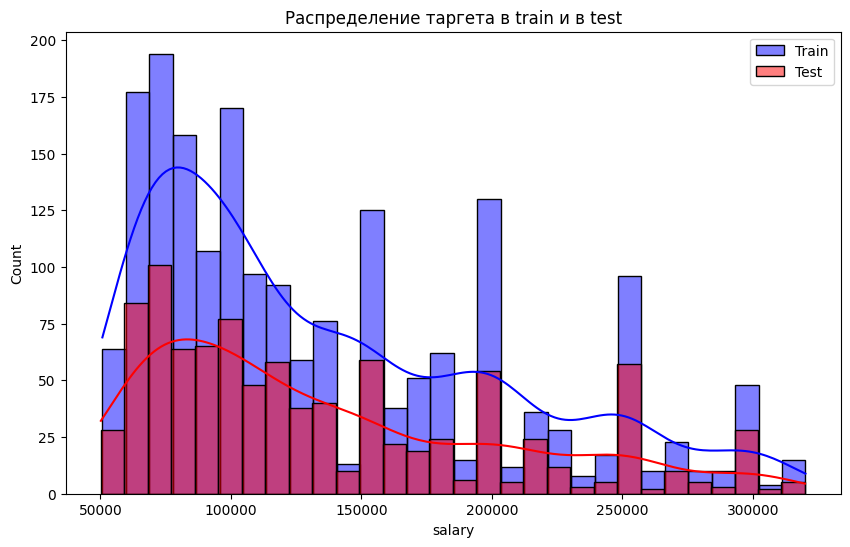

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_train, color="blue", label="Train", kde=True, bins=30)
sns.histplot(y_test, color="red", label="Test", kde=True, bins=30)
plt.title("Распределение таргета в train и в test")
plt.legend()
plt.show()

In [ ]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
train_preds = model_rf.predict(X_train)
test_preds = model_rf.predict(X_test)
train_evaluator = RegressionMetric(array(y_train), array(train_preds))
test_evaluator = RegressionMetric(array(y_test), array(test_preds))
print(f'MPE на трейне случайного леса {train_evaluator.mean_percentage_error()}')
print(f'MPE на тесте случайного леса {test_evaluator.mean_percentage_error()}')
print('-------------------------------------------------')
train_mae = mean_absolute_error(y_train, train_preds)
print(f'MAE случайного леса на трейне: {train_mae}')
test_mae = mean_absolute_error(y_test, test_preds)
print(f'MAE случайного леса на тeсте: {test_mae}')
print('-------------------------------------------------')
train_rmse = root_mean_squared_error(y_train, train_preds)
test_rmse = root_mean_squared_error(y_test, test_preds)
print(f'RMSE случайного леса на трейне: {train_rmse}')
print(f'RMSE случайного леса на тесте: {test_rmse}')
print('-------------------------------------------------')
train_mape = mean_absolute_percentage_error(y_train, train_preds)
test_mape = mean_absolute_percentage_error(y_test, test_preds)
print(f'MAPE случайного леса на трейне: {train_mape}')
print(f'MAPE случайного леса на тесте: {test_mape}')
print('-------------------------------------------------')
train_rmsle = np.sqrt(mean_squared_log_error(y_train, train_preds))
test_rmsle = np.sqrt(mean_squared_log_error(y_test, test_preds))
print(f'RMSLE случайного леса на трейне: {train_rmsle}')
print(f'RMSLE случайного леса на тесте: {test_rmsle}')


MPE на трейне случайного леса -0.04083640151503019
MPE на тесте случайного леса -0.0883961007633945
-------------------------------------------------
MAE случайного леса на трейне: 13298.882802824175
MAE случайного леса на тeсте: 33706.53540745225
-------------------------------------------------
RMSE случайного леса на трейне: 19012.58301277676
RMSE случайного леса на тесте: 46996.84184368278
-------------------------------------------------
MAPE случайного леса на трейне: 0.10903890071251919
MAPE случайного леса на тесте: 0.264929260242283
-------------------------------------------------
RMSLE случайного леса на трейне: 0.14490235778329602
RMSLE случайного леса на тесте: 0.32403341657942253


In [ ]:
model = CatBoostRegressor(random_state=42)
model.fit(X_train, y_train)

Learning rate set to 0.045481
0:	learn: 66757.9684096	total: 48.1ms	remaining: 48s
1:	learn: 65543.1983438	total: 51.2ms	remaining: 25.6s
2:	learn: 64329.9488590	total: 54.3ms	remaining: 18.1s
3:	learn: 63232.7458227	total: 57.4ms	remaining: 14.3s
4:	learn: 62279.7405778	total: 61.8ms	remaining: 12.3s
5:	learn: 61400.5252415	total: 64.8ms	remaining: 10.7s
6:	learn: 60592.8501009	total: 70.6ms	remaining: 10s
7:	learn: 59739.6046802	total: 73.6ms	remaining: 9.12s
8:	learn: 58904.5489967	total: 78.2ms	remaining: 8.62s
9:	learn: 58126.0201214	total: 82.2ms	remaining: 8.13s
10:	learn: 57422.7808121	total: 86.7ms	remaining: 7.8s
11:	learn: 56871.8623513	total: 92ms	remaining: 7.58s
12:	learn: 56297.6813153	total: 97ms	remaining: 7.36s
13:	learn: 55652.4524964	total: 102ms	remaining: 7.17s
14:	learn: 55199.3155490	total: 107ms	remaining: 7.01s
15:	learn: 54704.1413806	total: 112ms	remaining: 6.89s
16:	learn: 54206.8260911	total: 116ms	remaining: 6.72s
17:	learn: 53827.8009595	total: 121ms	rem

In [ ]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
train_evaluator = RegressionMetric(array(y_train), array(train_preds))
test_evaluator = RegressionMetric(array(y_test), array(test_preds))
print(f'MPE на трейне бустинга {train_evaluator.mean_percentage_error()}')
print(f'MPE на тесте бустинга {test_evaluator.mean_percentage_error()}')
print('-------------------------------------------------')
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)
print(f'MAE бустинга на трейне: {train_mae}')
print(f'MAE бустинга  на тeсте: {test_mae}')
print('-------------------------------------------------')
train_rmse = root_mean_squared_error(y_train, train_preds)
test_rmse = root_mean_squared_error(y_test, test_preds)
print(f'RMSE бустинга на трейне: {train_rmse}')
print(f'RMSE бустинга на тесте: {test_rmse}')
print('-------------------------------------------------')
train_mape = mean_absolute_percentage_error(y_train, train_preds)
test_mape = mean_absolute_percentage_error(y_test, test_preds)
print(f'MAPE бустинга на трейне: {train_mape}')
print(f'MAPE бустинга на тесте: {test_mape}')
print('-------------------------------------------------')
train_rmsle = np.sqrt(mean_squared_log_error(y_train, train_preds))
test_rmsle = np.sqrt(mean_squared_log_error(y_test, test_preds))
print(f'RMSLE бустинга на трейне: {train_rmsle}')
print(f'RMSLE бустинга на тесте: {test_rmsle}')

MPE на трейне бустинга -0.07417747780063473
MPE на тесте бустинга -0.09934019987585287
-------------------------------------------------
MAE бустинга на трейне: 24195.297320700254
MAE бустинга  на тeсте: 33792.799728531056
-------------------------------------------------
RMSE бустинга на трейне: 32378.456899791072
RMSE бустинга на тесте: 45311.87234348914
-------------------------------------------------
MAPE бустинга на трейне: 0.20290594514056326
MAPE бустинга на тесте: 0.27517138975328664
-------------------------------------------------
RMSLE бустинга на трейне: 0.2441736877346165
RMSLE бустинга на тесте: 0.3282335756663091


In [ ]:
best_loss = float('inf')
best_model_filename = "best_catboost_model.cbm"

def objective(trial):
    global best_loss

    param = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.02),
        'depth': trial.suggest_int('depth', 4, 10),  # Ограничение на глубину дерева
        'l2_leaf_reg': trial.suggest_uniform('l2_leaf_reg', 3.0, 10.0),  # Больше регуляризации
        'min_child_samples': trial.suggest_categorical('min_child_samples', [4, 8, 16, 32]),
        'grow_policy': 'Depthwise',
        'iterations': 8000,
        'use_best_model': True,
        'eval_metric': 'RMSE',
        'od_type': 'iter',
        'od_wait': 20,
        'random_state': 42,
        'logging_level': 'Silent'
    }

    regressor = CatBoostRegressor(**param)

    regressor.fit(X_train.copy(), y_train.copy(),
                  eval_set=[(X_train.copy(), y_train.copy())],
                  early_stopping_rounds=100)

    test_loss = root_mean_squared_error(y_test, regressor.predict(X_test.copy()))


    if test_loss < best_loss:
        best_loss = test_loss
        regressor.save_model(best_model_filename)
        print(f"New best model saved with test loss: {best_loss}")

    return test_loss


Для подбора гиперпараметров библиотека Optuna

In [ ]:
%%time
study = optuna.create_study(study_name='catboost-seed42')
study.optimize(objective, n_trials=500, n_jobs=-1, timeout=3600)

[I 2024-09-30 10:49:47,556] A new study created in memory with name: catboost-seed42
[I 2024-09-30 10:50:23,940] Trial 1 finished with value: 46467.81118887531 and parameters: {'learning_rate': 0.0120409273476441, 'depth': 6, 'l2_leaf_reg': 9.389470712384023, 'min_child_samples': 8}. Best is trial 1 with value: 46467.81118887531.


New best model saved with test loss: 46467.81118887531


[I 2024-09-30 10:51:09,584] Trial 0 finished with value: 46156.614832381594 and parameters: {'learning_rate': 0.012819545637081271, 'depth': 10, 'l2_leaf_reg': 9.992436840607866, 'min_child_samples': 4}. Best is trial 0 with value: 46156.614832381594.


New best model saved with test loss: 46156.614832381594


[I 2024-09-30 10:51:34,738] Trial 2 finished with value: 45476.66459675414 and parameters: {'learning_rate': 0.0029195834401510527, 'depth': 9, 'l2_leaf_reg': 8.108590916647124, 'min_child_samples': 4}. Best is trial 2 with value: 45476.66459675414.


New best model saved with test loss: 45476.66459675414


[I 2024-09-30 10:51:55,629] Trial 3 finished with value: 46047.78351497013 and parameters: {'learning_rate': 0.001014454991548333, 'depth': 6, 'l2_leaf_reg': 8.772961963965793, 'min_child_samples': 8}. Best is trial 2 with value: 45476.66459675414.
[I 2024-09-30 10:52:04,896] Trial 4 finished with value: 46944.38399864569 and parameters: {'learning_rate': 0.012518533183477511, 'depth': 5, 'l2_leaf_reg': 8.38830318160064, 'min_child_samples': 32}. Best is trial 2 with value: 45476.66459675414.
[I 2024-09-30 10:52:21,942] Trial 5 finished with value: 46211.06988573207 and parameters: {'learning_rate': 0.005016531205403784, 'depth': 4, 'l2_leaf_reg': 8.106180229368597, 'min_child_samples': 16}. Best is trial 2 with value: 45476.66459675414.
[I 2024-09-30 10:52:51,863] Trial 6 finished with value: 46765.39055154099 and parameters: {'learning_rate': 0.01279099059902259, 'depth': 7, 'l2_leaf_reg': 7.87865586142438, 'min_child_samples': 8}. Best is trial 2 with value: 45476.66459675414.
[I 20

New best model saved with test loss: 45402.83030206037


[I 2024-09-30 10:56:06,636] Trial 12 finished with value: 45547.48779418216 and parameters: {'learning_rate': 0.0028351596038632835, 'depth': 8, 'l2_leaf_reg': 5.036197050047537, 'min_child_samples': 4}. Best is trial 11 with value: 45402.83030206037.
[I 2024-09-30 10:56:20,888] Trial 13 finished with value: 45363.79812362972 and parameters: {'learning_rate': 0.002026515344594566, 'depth': 9, 'l2_leaf_reg': 4.0751682772227324, 'min_child_samples': 4}. Best is trial 13 with value: 45363.79812362972.


New best model saved with test loss: 45363.79812362972


[I 2024-09-30 10:57:35,404] Trial 14 finished with value: 45350.6048584056 and parameters: {'learning_rate': 0.0014081809372998525, 'depth': 9, 'l2_leaf_reg': 4.206051116510421, 'min_child_samples': 4}. Best is trial 14 with value: 45350.6048584056.


New best model saved with test loss: 45350.6048584056


[I 2024-09-30 10:57:39,269] Trial 15 finished with value: 45381.361265706786 and parameters: {'learning_rate': 0.0013854481966218341, 'depth': 9, 'l2_leaf_reg': 3.1566926880639956, 'min_child_samples': 4}. Best is trial 14 with value: 45350.6048584056.
[I 2024-09-30 10:58:43,764] Trial 17 finished with value: 45668.22987813103 and parameters: {'learning_rate': 0.001605040789445063, 'depth': 10, 'l2_leaf_reg': 3.3898469871336046, 'min_child_samples': 32}. Best is trial 14 with value: 45350.6048584056.
[I 2024-09-30 10:58:47,183] Trial 16 finished with value: 45609.517615372555 and parameters: {'learning_rate': 0.0011314061114621303, 'depth': 9, 'l2_leaf_reg': 3.044427813048417, 'min_child_samples': 32}. Best is trial 14 with value: 45350.6048584056.
[I 2024-09-30 10:59:38,829] Trial 19 finished with value: 45641.931729689226 and parameters: {'learning_rate': 0.0019280391889498426, 'depth': 7, 'l2_leaf_reg': 4.17609037156628, 'min_child_samples': 4}. Best is trial 14 with value: 45350.60

New best model saved with test loss: 45308.92373476918


[I 2024-09-30 11:04:54,990] Trial 27 finished with value: 45420.071931637016 and parameters: {'learning_rate': 0.003833500850954301, 'depth': 10, 'l2_leaf_reg': 5.721393677319278, 'min_child_samples': 4}. Best is trial 25 with value: 45308.92373476918.
[I 2024-09-30 11:05:00,224] Trial 26 finished with value: 45351.23888631293 and parameters: {'learning_rate': 0.0020678038550743403, 'depth': 10, 'l2_leaf_reg': 5.742067083009089, 'min_child_samples': 4}. Best is trial 25 with value: 45308.92373476918.
[I 2024-09-30 11:05:59,912] Trial 29 finished with value: 46362.17928451674 and parameters: {'learning_rate': 0.005946851495108184, 'depth': 10, 'l2_leaf_reg': 7.185637691983648, 'min_child_samples': 16}. Best is trial 25 with value: 45308.92373476918.
[I 2024-09-30 11:06:12,177] Trial 28 finished with value: 45636.43735864186 and parameters: {'learning_rate': 0.0021353771035910922, 'depth': 10, 'l2_leaf_reg': 4.562483039710244, 'min_child_samples': 16}. Best is trial 25 with value: 45308.

New best model saved with test loss: 45261.61282265291


[I 2024-09-30 11:08:46,088] Trial 32 finished with value: 45294.70476121057 and parameters: {'learning_rate': 0.002102082668787477, 'depth': 10, 'l2_leaf_reg': 5.320503724250126, 'min_child_samples': 4}. Best is trial 33 with value: 45261.61282265291.
[I 2024-09-30 11:10:08,698] Trial 35 finished with value: 45300.57704961501 and parameters: {'learning_rate': 0.0024241061771976533, 'depth': 10, 'l2_leaf_reg': 3.5606758512638703, 'min_child_samples': 4}. Best is trial 33 with value: 45261.61282265291.
[I 2024-09-30 11:10:09,789] Trial 34 finished with value: 45275.01254991006 and parameters: {'learning_rate': 0.0023065855650162875, 'depth': 10, 'l2_leaf_reg': 3.569302045749827, 'min_child_samples': 4}. Best is trial 33 with value: 45261.61282265291.
[I 2024-09-30 11:11:19,407] Trial 37 finished with value: 45437.547794556805 and parameters: {'learning_rate': 0.002466318500050612, 'depth': 10, 'l2_leaf_reg': 3.5618525224011544, 'min_child_samples': 8}. Best is trial 33 with value: 45261.

New best model saved with test loss: 45249.74922480299


[I 2024-09-30 11:14:40,541] Trial 43 finished with value: 45308.385026629636 and parameters: {'learning_rate': 0.002383416124009386, 'depth': 10, 'l2_leaf_reg': 3.84521079013863, 'min_child_samples': 4}. Best is trial 42 with value: 45249.74922480299.
[I 2024-09-30 11:15:49,613] Trial 44 finished with value: 45240.69863500473 and parameters: {'learning_rate': 0.0022872234616090007, 'depth': 10, 'l2_leaf_reg': 4.605487911219159, 'min_child_samples': 4}. Best is trial 44 with value: 45240.69863500473.


New best model saved with test loss: 45240.69863500473


[I 2024-09-30 11:15:55,313] Trial 45 finished with value: 45425.161588627176 and parameters: {'learning_rate': 0.001854574022013172, 'depth': 9, 'l2_leaf_reg': 4.552383629395243, 'min_child_samples': 4}. Best is trial 44 with value: 45240.69863500473.
[I 2024-09-30 11:16:25,424] Trial 47 finished with value: 45875.064552475196 and parameters: {'learning_rate': 0.0037173360593378835, 'depth': 5, 'l2_leaf_reg': 3.203325179761732, 'min_child_samples': 4}. Best is trial 44 with value: 45240.69863500473.
[I 2024-09-30 11:17:04,109] Trial 46 finished with value: 45981.63759106624 and parameters: {'learning_rate': 0.008039926222922877, 'depth': 9, 'l2_leaf_reg': 4.639599614578325, 'min_child_samples': 4}. Best is trial 44 with value: 45240.69863500473.
[I 2024-09-30 11:17:40,629] Trial 48 finished with value: 45592.39601728453 and parameters: {'learning_rate': 0.0016990241384706724, 'depth': 10, 'l2_leaf_reg': 3.9874075986900896, 'min_child_samples': 16}. Best is trial 44 with value: 45240.69

New best model saved with test loss: 45233.2764420916


[I 2024-09-30 11:26:31,849] Trial 60 finished with value: 45338.9720717754 and parameters: {'learning_rate': 0.0010143193582349678, 'depth': 10, 'l2_leaf_reg': 4.263578686415517, 'min_child_samples': 4}. Best is trial 61 with value: 45233.2764420916.
[I 2024-09-30 11:27:51,917] Trial 62 finished with value: 45318.98983214714 and parameters: {'learning_rate': 0.001719615696951563, 'depth': 10, 'l2_leaf_reg': 3.7867432267116428, 'min_child_samples': 4}. Best is trial 61 with value: 45233.2764420916.
[I 2024-09-30 11:28:01,028] Trial 63 finished with value: 45214.96481911176 and parameters: {'learning_rate': 0.001739357070772435, 'depth': 10, 'l2_leaf_reg': 3.0286899769302424, 'min_child_samples': 4}. Best is trial 63 with value: 45214.96481911176.


New best model saved with test loss: 45214.96481911176


[I 2024-09-30 11:29:31,053] Trial 65 finished with value: 45226.508198748146 and parameters: {'learning_rate': 0.0016001912153408128, 'depth': 10, 'l2_leaf_reg': 3.209978649941541, 'min_child_samples': 4}. Best is trial 63 with value: 45214.96481911176.
[I 2024-09-30 11:29:35,869] Trial 64 finished with value: 45211.52976838712 and parameters: {'learning_rate': 0.0015985828251992148, 'depth': 10, 'l2_leaf_reg': 3.098910519850125, 'min_child_samples': 4}. Best is trial 64 with value: 45211.52976838712.


New best model saved with test loss: 45211.52976838712


[I 2024-09-30 11:30:43,594] Trial 67 finished with value: 45460.43962411043 and parameters: {'learning_rate': 0.0015565317424737918, 'depth': 9, 'l2_leaf_reg': 3.053344527636151, 'min_child_samples': 8}. Best is trial 64 with value: 45211.52976838712.
[I 2024-09-30 11:31:13,805] Trial 66 finished with value: 45249.878251142356 and parameters: {'learning_rate': 0.0015728340347132034, 'depth': 10, 'l2_leaf_reg': 3.057760794665357, 'min_child_samples': 4}. Best is trial 64 with value: 45211.52976838712.
[I 2024-09-30 11:32:24,681] Trial 68 finished with value: 45234.73018693887 and parameters: {'learning_rate': 0.0015877478745271027, 'depth': 10, 'l2_leaf_reg': 3.032879176631564, 'min_child_samples': 4}. Best is trial 64 with value: 45211.52976838712.
[I 2024-09-30 11:32:52,758] Trial 69 finished with value: 45214.749380313355 and parameters: {'learning_rate': 0.0013694820833616906, 'depth': 10, 'l2_leaf_reg': 3.0126276141614188, 'min_child_samples': 4}. Best is trial 64 with value: 45211

New best model saved with test loss: 45209.69075998371


[I 2024-09-30 11:38:13,292] Trial 77 finished with value: 46005.66353860438 and parameters: {'learning_rate': 0.0011099347676147677, 'depth': 5, 'l2_leaf_reg': 3.640170145923902, 'min_child_samples': 4}. Best is trial 75 with value: 45209.69075998371.


In [ ]:
print(study.best_value)
print(study.best_params)

In [ ]:
params = {'learning_rate': 0.008577124623387724, 'depth': 10, 'l2_leaf_reg': 4.068548794859672, 'min_child_samples': 4}
model_hyper = CatBoostRegressor(**params, iterations=4000, early_stopping_rounds=100, random_state=42)
model_hyper.fit(X_train, y_train)
model_hyper.save_model('cb_super',
           format="cbm",
           export_parameters=None,
           pool=None)

0:	learn: 67766.2921920	total: 43.7ms	remaining: 2m 54s
1:	learn: 67517.5827969	total: 104ms	remaining: 3m 28s
2:	learn: 67275.6610606	total: 151ms	remaining: 3m 21s
3:	learn: 67045.6762599	total: 202ms	remaining: 3m 21s
4:	learn: 66809.5731484	total: 245ms	remaining: 3m 15s
5:	learn: 66567.9332885	total: 314ms	remaining: 3m 28s
6:	learn: 66336.3444353	total: 361ms	remaining: 3m 26s
7:	learn: 66104.4386301	total: 395ms	remaining: 3m 17s
8:	learn: 65898.8480616	total: 432ms	remaining: 3m 11s
9:	learn: 65680.3636290	total: 455ms	remaining: 3m 1s
10:	learn: 65455.8431217	total: 480ms	remaining: 2m 54s
11:	learn: 65226.5956681	total: 517ms	remaining: 2m 51s
12:	learn: 64994.7763235	total: 553ms	remaining: 2m 49s
13:	learn: 64770.4348112	total: 594ms	remaining: 2m 49s
14:	learn: 64551.9519507	total: 640ms	remaining: 2m 49s
15:	learn: 64350.0803063	total: 687ms	remaining: 2m 51s
16:	learn: 64139.1745479	total: 731ms	remaining: 2m 51s
17:	learn: 63930.2345737	total: 770ms	remaining: 2m 50s
18

In [ ]:
from catboost import CatBoostRegressor
model_load = CatBoostRegressor()
model_load.load_model('/content/cb_super')

In [ ]:
train_preds = model_load.predict(X_train)
test_preds = model_load.predict(X_test)
train_evaluator = RegressionMetric(array(y_train), array(train_preds))
test_evaluator = RegressionMetric(array(y_test), array(test_preds))
print(f'MPE на трейне бустинга {train_evaluator.mean_percentage_error()}')
print(f'MPE на тесте бустинга {test_evaluator.mean_percentage_error()}')
print('-------------------------------------------------')
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)
print(f'MAE бустинга на трейне: {train_mae}')
print(f'MAE бустинга  на тeсте: {test_mae}')
print('-------------------------------------------------')
train_rmse = root_mean_squared_error(y_train, train_preds)
test_rmse = root_mean_squared_error(y_test, test_preds)
print(f'RMSE бустинга на трейне: {train_rmse}')
print(f'RMSE бустинга на тесте: {test_rmse}')
print('-------------------------------------------------')
train_mape = mean_absolute_percentage_error(y_train, train_preds)
test_mape = mean_absolute_percentage_error(y_test, test_preds)
print(f'MAPE бустинга на трейне: {train_mape}')
print(f'MAPE бустинга на тесте: {test_mape}')
print('-------------------------------------------------')
train_rmsle = np.sqrt(mean_squared_log_error(y_train, train_preds))
test_rmsle = np.sqrt(mean_squared_log_error(y_test, test_preds))
print(f'RMSLE бустинга на трейне: {train_rmsle}')
print(f'RMSLE бустинга на тесте: {test_rmsle}')

MPE на трейне бустинга -0.06638070591066969
MPE на тесте бустинга -0.09537580509680627
-------------------------------------------------
MAE бустинга на трейне: 21448.901557304718
MAE бустинга  на тeсте: 32952.76537583355
-------------------------------------------------
RMSE бустинга на трейне: 29170.312176752075
RMSE бустинга на тесте: 44582.86986349259
-------------------------------------------------
MAPE бустинга на трейне: 0.18017923813101494
MAPE бустинга на тесте: 0.26495727006177805
-------------------------------------------------
RMSLE бустинга на трейне: 0.2220970439358276
RMSLE бустинга на тесте: 0.3145139018357874


**Анализ результатов**

При преобразовании признаков experience, area, employment_стажировка метрики улучшились. До преобразований и консутрирования новых признаков результаты лучшей модели с гиперпараметрами составляли: RMSE на тесте 48692, а MAPE 0.297

Наилучшие метрики из всех экспериментов

**RMSE на трейне:** 29170.312176752075

**RMSE на тесте:** 44582.86986349259

RMSE - более чувствительная метрика к большим ошибкам, чем MAE. Аналогично MAE, RMSE на тесте значительно выше, чем на трейнере, что говорит о плохой обобщающей способности модели.

**MAPE на трейне:** 0.18017923813101494

**MAPE на тесте:** 0.26495727006177805

MAPE показывает средний процент ошибки прогнозирования. Значительное увеличение MAPE на тестовых данных по сравнению с тренировочными также подтверждает проблемы с обобщением модели.

1. RMSE (Root Mean Squared Error) - основная метрика

Выбор RMSE в качестве основной метрики обусловлен несколькими факторами:

* Чувствительность к ошибкам: RMSE более чувствительна к большим ошибкам, чем MAE. Это важно, если большие ошибки имеют серьезные последствия. Например, в прогнозировании цен на недвижимость большая ошибка может привести к значительным финансовым потерям.
* Масштабируемость: RMSE имеет тот же масштаб, что и исходные данные. Это делает ее более понятной и сравнимой с другими показателями.
* Интуитивность: RMSE легко интерпретировать как среднюю ошибку прогнозирования в масштабе исходных данных.

2. MAPE (Mean Absolute Percentage Error) - для интерпретации RMSE

MAPE дополняет RMSE, помогая интерпретировать ее результаты:

* Процентная ошибка: MAPE показывает среднюю процентную ошибку прогнозирования. Это помогает понять, насколько велика ошибка относительно фактического значения. Например, если RMSE = 10000, но MAPE = 5%, то это означает, что ошибка составляет 5% от фактического значения.
* Сравнение разных моделей: MAPE позволяет сравнивать качество разных моделей, даже если они прогнозируют разные значения.

Почему не выбраны другие метрики:

* MPE (Mean Percentage Error): MPE чувствительна к выбросам, и ее значения могут быть сильно искажены, если есть несколько больших ошибок.
* MAE (Mean Absolute Error): MAE не так чувствительна к большим ошибкам, как RMSE.
* RMSLE (Root Mean Squared Logarithmic Error): RMSLE полезен для 'перепрогноза'. Перепрогноз зарплат может вызвать положительную эмоцию у пользователей, однако при несоотсветствии зарплат на рынке и в продукте, пользователи перестанут доверять продукту

Выводы:

Метрики улучшились, однако все еще демонстрируют плохую обобщаемость модели


In [ ]:
explainer = shap.Explainer(model_load)
shap_values = explainer(X_test)

Получаем вклад каждого признака в результат

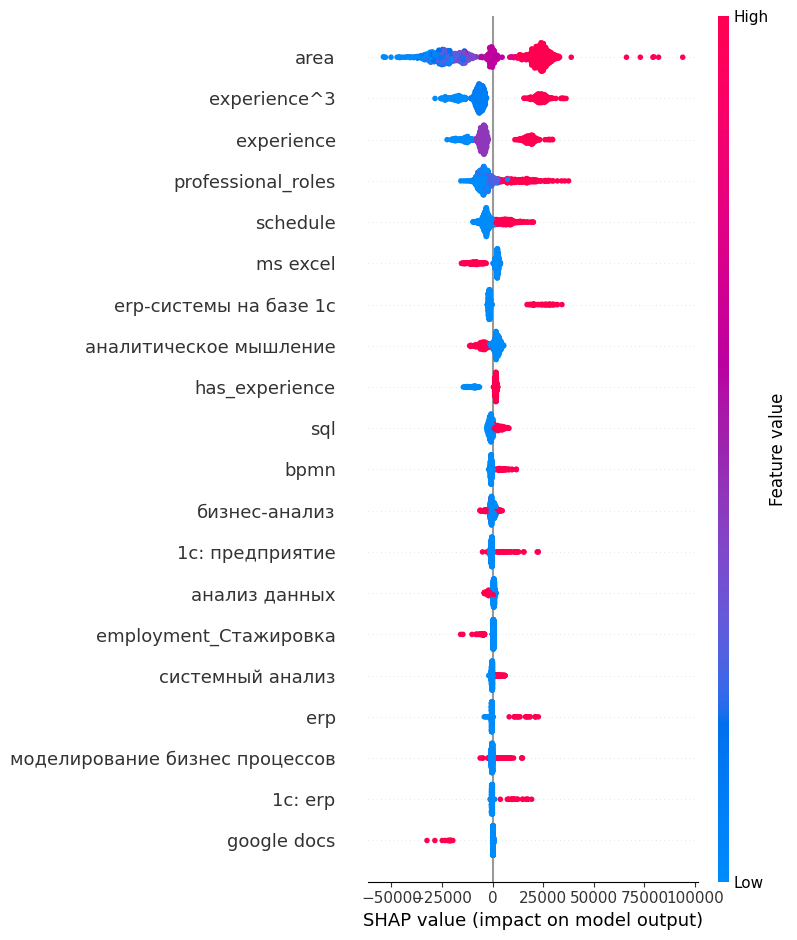

In [ ]:
shap.summary_plot(shap_values, X_test)

Видим, что самыми значимыми признаками, которые оказывают наибольшее влияние на предсказания модели, являются: area_to_salary_ratio, area,
experience_to_salary_ratio

In [ ]:
shap_values_df = pd.DataFrame(shap_values.values, columns=X_test.columns)

In [ ]:
shap_values_df

,area,schedule,experience,professional_roles,employment_Проектная работа,employment_Стажировка,employment_Частичная занятость,experience^3,has_experience,use case analysis,...,системный анализ,контроль и анализ ценообразования,wms,сводные таблицы,проектная документация,erp-системы на базе 1с,r,разработка бизнес-модели,gtm,эконометрика
0,24466.542114,-2035.262979,-5775.934302,-7342.411190,10.819027,525.401764,343.385685,-7420.453154,1692.108919,45.893800,...,-171.208194,20.827087,-83.980707,27.127785,-2.003260,-1994.592746,8.519780,19.245634,-0.015657,8.973136
1,89.687052,-4017.120593,-4247.528753,-8361.028560,17.307558,383.503966,237.526259,-5944.362602,1450.574597,31.484168,...,1337.574608,13.713838,-72.670025,14.753712,-1.185244,-1726.451986,6.150263,18.397189,-0.015657,8.479756
2,18412.325789,-1458.052288,-19855.655464,1204.311456,25.475301,190.044591,279.812592,-24594.960713,-12896.102196,45.625169,...,2373.509732,17.422144,-70.353234,6.554075,-4.318682,-1349.282926,8.289960,17.308432,-0.052159,8.829262
3,-25468.841666,-6116.755379,15917.835956,-4881.156345,29.187605,452.386366,221.134340,21306.654085,1334.978253,27.816120,...,-530.759990,9.793611,-236.573606,25.166100,-9.378490,-1207.468068,6.472147,22.344535,0.210105,8.360586
4,-23864.984285,-2918.700296,-3864.187148,-4349.580573,-11.734927,364.009592,230.711216,-5145.769766,1287.592123,31.475214,...,-199.389119,9.419718,-92.588070,24.121435,-4.692510,-1597.706042,5.915443,17.889992,-0.208203,8.354236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,2256.238779,-3645.599890,-15505.712074,-4385.991298,42.971515,206.767547,244.278805,-19948.721490,-11290.612928,29.696984,...,-230.518310,13.921559,-77.326313,13.283372,-24.803148,-769.771501,5.540968,18.934531,-0.052159,8.457146
954,25691.687372,-1525.573486,18128.463987,-3031.305924,25.604396,465.119686,573.998743,23736.123043,1586.298409,30.876278,...,-793.993825,19.824070,-143.996603,12.984865,-2.605410,-1544.467206,10.907178,20.935083,0.389081,8.836212
955,-12194.753553,3947.069470,-3758.799562,-2994.182579,92.366855,135.103090,242.402328,-5537.812357,1281.272481,24.120108,...,-324.107242,10.151432,-59.847805,-1.883550,-11.300059,-1931.405536,5.137807,15.015746,0.081218,8.469625
956,25921.260388,6121.231545,20827.641479,-2152.393950,156.727146,500.577859,379.445423,26565.569112,1767.765855,41.614117,...,-954.006062,16.446400,-144.104157,17.623523,-0.838390,-2625.513577,6.928316,27.234071,0.478019,9.836613


Для последующей предобработки признаков сохраним словари значений mean_target для признаков area, schedule, professional_roles

In [ ]:
def save_mean_target(df):
  area_mean = df.groupby('area')['salary'].mean()
  schedule_mean = df.groupby('schedule')['salary'].mean()
  prof_mean = df.groupby('professional_roles')['salary'].mean()

  df['area_mean_tar'] = df['area'].map(area_mean)
  df['schedule_mean_tar'] = df['schedule'].map(schedule_mean)
  df['prof_mean_tar'] = df['professional_roles'].map(prof_mean)

  dic_area = {}
  dic_schedule = {}
  dic_prof = {}
  for value in df['area'].unique():
    dic_area[value] = df_for_mean[df['area'] == value]['area_mean_tar'].mean()
  for value in df['schedule'].unique():
    dic_schedule[value] = df[df['schedule'] == value]['schedule_mean_tar'].mean()
  for value in df['professional_roles'].unique():
    dic_prof[value] = df[df['professional_roles'] == value]['prof_mean_tar'].mean()

  return dic_area, dic_schedule, dic_prof

Если признак отсуствует, заполняем его средним по всей выборке

In [ ]:
global_mean_target = y_train.mean()
global_mean_target

136153.29417562982